In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [52]:
df_time = pd.read_csv("../Assets/JHU_Data_2020.02.07_PM.csv")

In [53]:
df_total = pd.read_csv("../Assets/JHU_SID_2020.02.07.csv")

In [54]:
df_country_pop = pd.read_csv("../Assets/World_Bank_Population.csv")

In [55]:
df_city_pop = pd.read_csv("../Assets/Cities Populations.csv")

In [56]:
df_time['Country/Region'].value_counts()

Mainland China          31
US                       6
Australia                4
Canada                   3
Philippines              1
South Korea              1
United Arab Emirates     1
Japan                    1
Belgium                  1
Singapore                1
Taiwan                   1
Hong Kong                1
Italy                    1
Germany                  1
Thailand                 1
Cambodia                 1
Sweden                   1
India                    1
Spain                    1
Finland                  1
Malaysia                 1
Macau                    1
Vietnam                  1
Sri Lanka                1
Russia                   1
Others                   1
France                   1
UK                       1
Nepal                    1
Name: Country/Region, dtype: int64

### Get Country Population Estimates

In [57]:
df_countries = df_time[(df_time['Province/State'].isnull())]
df_countries.reset_index(drop=True, inplace=True)

In [58]:
country_list = []
for i in range(len(df_countries)):
    country_list.append(df_countries['Country/Region'][i])

In [59]:
list_in = []
list_out = []
for n in country_list:
    if n in list(df_country_pop["Country Name"]):
        list_in.append(n)
    else:
        list_out.append(n)

print(list_in)
print(list_out)

['Thailand', 'Japan', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium']
['South Korea', 'UK', 'Russia']


In [60]:
df_time['Population'] = pd.Series()

In [61]:
for n in range(len(list_in)):
    df_time.loc[df_time['Country/Region'] == list_in[n], 'Population'] = int(df_country_pop[(df_country_pop["Country Name"] == list_in[n])]['2018'])

In [62]:
list_out_rev = ['Korea, Rep.', 'Russian Federation', 'United Kingdom']

for n in range(len(list_out)):
    df_time.loc[df_time['Country/Region'] == list_out[n], 'Population'] = int(df_country_pop[(df_country_pop["Country Name"] == list_out_rev[n])]['2018'])

In [63]:
df_time[(df_time['Province/State'].isnull())]

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 22:00,1/22/2020 12:00,1/23/2020 12:00,1/24/2020 0:00,1/24/2020 12:00,...,2/2/2020 21:00,2/3/2020 21:00,2/4/2020 9:40,2/4/2020 22:00,2/5/2020 9:00,2/5/2020 23:00,2/6/2020 9:00,2/6/2020 14:20,2/7/2020 20:13,Population
31,NaN,Thailand,1/13/2020,13.7563,100.5018,2.0,2.0,3.0,4.0,5.0,...,19.0,19.0,19.0,25.0,25.0,25.0,25.0,25.0,25.0,6.942852e+07
32,NaN,Japan,1/16/2020,35.6762,139.6503,1.0,2.0,2.0,2.0,2.0,...,20.0,20.0,20.0,22.0,22.0,45.0,45.0,45.0,25.0,1.265291e+08
33,NaN,South Korea,1/21/2020,37.5665,126.9780,NaN,1.0,1.0,1.0,2.0,...,15.0,15.0,15.0,16.0,16.0,23.0,23.0,23.0,24.0,5.163526e+07
41,NaN,Singapore,1/23/2020,1.3521,103.8198,NaN,NaN,1.0,1.0,3.0,...,18.0,18.0,18.0,24.0,24.0,28.0,28.0,28.0,30.0,5.638676e+06
42,NaN,Vietnam,1/23/2020,21.0278,105.8342,NaN,NaN,2.0,2.0,2.0,...,6.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,9.554040e+07
43,NaN,France,1/24/2020,46.2276,2.2137,NaN,NaN,NaN,NaN,2.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.698724e+07
44,NaN,Nepal,1/25/2020,28.3949,84.1240,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.808787e+07
45,NaN,Malaysia,1/25/2020,4.2105,101.9758,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,10.0,10.0,12.0,12.0,12.0,12.0,3.152858e+07
51,NaN,Cambodia,1/27/2020,12.5657,104.9910,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.624980e+07
52,NaN,Sri Lanka,1/27/2020,7.8731,80.7718,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.167000e+07


### Get City Population Estimates

In [64]:
df_cities = df_time[(df_time['Province/State'].notnull())]
df_cities.reset_index(drop=True, inplace=True)
df_cities

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 22:00,1/22/2020 12:00,1/23/2020 12:00,1/24/2020 0:00,1/24/2020 12:00,...,2/2/2020 21:00,2/3/2020 21:00,2/4/2020 9:40,2/4/2020 22:00,2/5/2020 9:00,2/5/2020 23:00,2/6/2020 9:00,2/6/2020 14:20,2/7/2020 20:13,Population
0,Anhui,Mainland China,1/3/2020,31.82571,117.22640,NaN,1.0,9.0,15.0,15.0,...,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,NaN
1,Beijing,Mainland China,1/3/2020,40.18238,116.41420,10.0,14.0,22.0,26.0,36.0,...,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,NaN
2,Chongqing,Mainland China,1/3/2020,30.05718,107.87400,5.0,6.0,9.0,27.0,27.0,...,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415.0,NaN
3,Fujian,Mainland China,1/3/2020,26.07783,117.98950,NaN,1.0,5.0,5.0,10.0,...,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224.0,NaN
4,Gansu,Mainland China,1/3/2020,36.06110,103.83430,NaN,NaN,2.0,2.0,2.0,...,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67.0,NaN
5,Guangdong,Mainland China,1/3/2020,23.33841,113.42200,17.0,26.0,32.0,53.0,53.0,...,683.0,725.0,797.0,870.0,895.0,944.0,970.0,970.0,1034.0,NaN
6,Guangxi,Mainland China,1/3/2020,23.82908,108.78810,NaN,2.0,5.0,13.0,23.0,...,127.0,139.0,139.0,150.0,150.0,168.0,168.0,168.0,172.0,NaN
7,Guizhou,Mainland China,1/3/2020,26.81536,106.87480,NaN,1.0,3.0,3.0,3.0,...,46.0,56.0,56.0,64.0,64.0,69.0,71.0,71.0,81.0,NaN
8,Hainan,Mainland China,1/3/2020,19.19673,109.74550,NaN,4.0,5.0,8.0,8.0,...,71.0,79.0,79.0,91.0,91.0,100.0,106.0,106.0,117.0,NaN
9,Hebei,Mainland China,1/3/2020,38.04280,114.51490,NaN,1.0,1.0,2.0,2.0,...,113.0,126.0,126.0,135.0,135.0,157.0,157.0,157.0,172.0,NaN


In [77]:
df_cities["Population"] = pd.Series()

C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_cities.head

<bound method NDFrame.head of       Province/State  Country/Region First confirmed date in country (Est.)  \
0              Anhui  Mainland China                               1/3/2020   
1            Beijing  Mainland China                               1/3/2020   
2          Chongqing  Mainland China                               1/3/2020   
3             Fujian  Mainland China                               1/3/2020   
4              Gansu  Mainland China                               1/3/2020   
5          Guangdong  Mainland China                               1/3/2020   
6            Guangxi  Mainland China                               1/3/2020   
7            Guizhou  Mainland China                               1/3/2020   
8             Hainan  Mainland China                               1/3/2020   
9              Hebei  Mainland China                               1/3/2020   
10      Heilongjiang  Mainland China                               1/3/2020   
11             Henan  

In [ ]:
for n in range(len(df_city)

In [79]:
df_city_pop.head()

,Province/State,Country/Region,Population,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Anhui,Mainland China,62550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,21710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,30750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,39110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,26260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SIR Feature Extraction

In [65]:
df_total['Region'] = pd.Series()

In [66]:
for i in range(len(df_total)):
    if isinstance(df_total["Province/State"][i], float):
        df_total["Region"][i] = df_total["Country/Region"][i]
    else:
        df_total["Region"][i] = df_total["Province/State"][i]

C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
df_total["Population"] = pd.Series()

In [68]:
for n in range(len(df_total)):
    if isinstance(df_total["Province/State"][n], float):
        df_total['Population'][n] = int(df_time.loc[df_time['Country/Region'] == df_total['Region'][n], 'Population'])
    else:
        continue

C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
df_city_pop["Population"][0] = 62550000

C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_city_pop.head()

,Province/State,Country/Region,Population,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Anhui,Mainland China,62550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,21710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,30750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,39110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,26260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_total = df_total[df_total["Region"] != 'Cruise Ship']

In [72]:
df_total = df_total[df_total["Region"] != 'Inner Mongolia']

In [73]:
df_total

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Region,Population
0,Hubei,Mainland China,2/7/2020 14:03,22112,618,867.0,Hubei,NaN
1,Guangdong,Mainland China,2/7/2020 10:13,1034,1,88.0,Guangdong,NaN
2,Zhejiang,Mainland China,2/7/2020 11:33,1006,0,123.0,Zhejiang,NaN
3,Henan,Mainland China,2/7/2020 14:03,914,3,86.0,Henan,NaN
4,Hunan,Mainland China,2/7/2020 11:33,772,0,112.0,Hunan,NaN
5,Anhui,Mainland China,2/7/2020 5:13,665,0,47.0,Anhui,NaN
6,Jiangxi,Mainland China,2/7/2020 1:23,661,0,45.0,Jiangxi,NaN
7,Chongqing,Mainland China,2/7/2020 12:03,415,2,31.0,Chongqing,NaN
8,Jiangsu,Mainland China,2/7/2020 14:03,408,0,43.0,Jiangsu,NaN
9,Shandong,Mainland China,2/7/2020 11:33,386,0,37.0,Shandong,NaN


In [81]:
df_total.to_csv(r"../Assets/Output.csv")

In [50]:
for n in range(len(df_total)):
    if df_total["Population"][n].isnull():
        df_total['Population'][n] = int(df_city_pop.loc[df_city_pop['Province/State'] == df_total['Region'][n], 'Population'])
    else:
        continue

AttributeError: 'numpy.float64' object has no attribute 'isnull'

In [ ]:
def get_stats(Region = "South Korea"):
    R0 = int(df_total[(df_total["Region"] == Region)]["Recovered"])
    D0 = int(df_total[(df_total["Region"] == Region)]["Deaths"])
    I0 = int(df_total[(df_total["Region"] == Region)]["Confirmed"] - R0 - D0)
    S0 = int(df_total[(df_total["Region"] == Region)]["Population"] - I0 - R0 - D0)
    N = int(df_total[(df_total["Region"] == Region)]["Population"])
    return(N, R0, D0, I0, S0)

### Initial SIR Models

In [132]:
regions = list(df_total["Region"])
regions.sort()

dropdown_region = widgets.Dropdown(options = regions)
dropdown_region

Dropdown(options=('Anhui', 'Beijing', 'Belgium', 'Boston, MA', 'British Columbia', 'Cambodia', 'Chicago, IL', …

In [172]:
region = str(dropdown_region.value)
N, R0, D0, I0, S0 = get_stats(Region = region)
print("Currently, there are {0} patients with a confirmed diagnosis of nCoV in {1}.".format(I0, region))

Currently, there are 6 patients with a confirmed diagnosis of nCoV in France.


In [173]:
duration_slider = widgets.IntSlider(min=0, max=20, step=1, description='Duration (D):',value=14)
duration_slider

IntSlider(value=14, description='Duration (D):', max=20)

In [174]:
Rnaught_slider = widgets.FloatSlider(value= 2, min=0, max=3, step=0.1, description='R0:')
Rnaught_slider

FloatSlider(value=2.0, description='R0:', max=3.0)

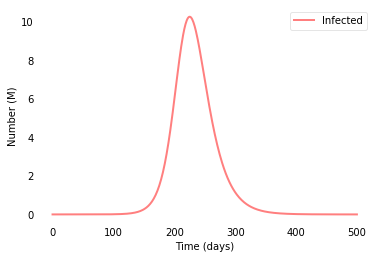

In [175]:
duration = int(duration_slider.value)
Rnaught = float(Rnaught_slider.value)

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
gamma = float(1/duration)
beta = float(Rnaught*gamma)

# A grid of time points (in days)
t = np.linspace(0, 500, 500)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
#ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (M)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()